<a href="https://colab.research.google.com/github/andryelarossignol/KNN/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#K-Nearest Neighbors(KNN)

#works based on the similarity between the data
#Data Storage: KNN stores all the training examples.
#Distance Calculation: When a new data point needs to be classified, KNN calculates the distance between this point and all the data points in the training set.
#Selection of Nearest Neighbors: It selects the ‘k’ nearest data points (neighbors).
#Arucaccy= Number of correct predictions/Total number of predctions
#Precision= true positives/ true positives+false positives
#Recall=true positives/true positives/false negatives
#F1=precision.recall/precision+recall
#Classification: For classification, KNN assigns the most common class among the ‘k’ neighbors.For regression, it calculates the average of the values of the ‘k’ neighbors.
#Vantagens: Simplicidade, fácil de entender e implementar.
#Desvantagens: Pode ser computacionalmente caro para grandes conjuntos de dados, pois precisa calcular a distância para todos os pontos de dados.
#Confusin matrix: Shows the count of true positives, false positives, true negatives, and false negatives


In [38]:
from google.colab import auth
auth.authenticate_user()
!git config --global user.email "andryelarossignol0@gmail.com"
!git config --global user.name "andryelarossignol"


In [40]:
%cd KNN

[Errno 2] No such file or directory: 'KNN'
/content


In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target #X: Flower features (the four measurements). Y: Flower targets, i.e. the species to which each flower belongs.


In [20]:
# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #rando_state: ensures that the data split is the same on each code run.


In [27]:
# Create the KNN classifier with k=3

knn=KNeighborsClassifier()

In [31]:
# Set parameters for a grid search
# Finds the best value of k that maximizes the average accuracy during cross-validation
parameters = {'n_neighbors': list(range(1, 31))}
clf = GridSearchCV(knn, parameters, cv=5)

clf.fit(X_train,y_train)

best_k = clf.best_params_['n_neighbors']
print(f"the best k value {best_k}")

the best k value 1


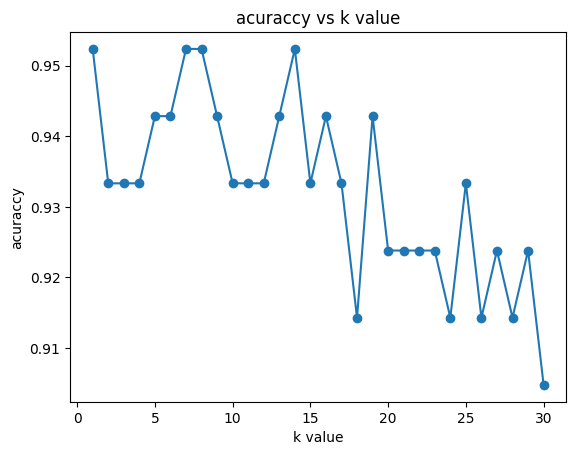

In [33]:
k_values = np.arange(1, 31)
accuracies = [clf.cv_results_['mean_test_score'][i] for i in range(len(k_values))]
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k value')
plt.ylabel('acuraccy')
plt.title('acuraccy vs k value')
plt.show()

In [34]:
# Make predictions in the test suite
y_pred = grid_search.predict(X_test)


# Acuraccy, precision, recall, F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall= recall_score(y_test, y_pred, average='macro')
f1= f1_score(y_test, y_pred, average='macro')


print(f'Acuraccy:{accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

Acuraccy:1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



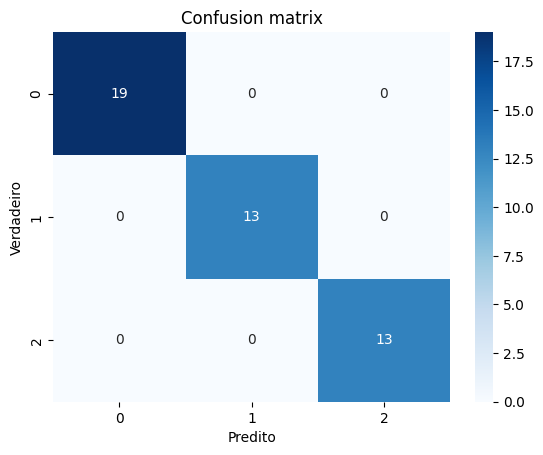

In [35]:

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Confusion matrix')
plt.show()

In [36]:
# Test k values from 1 to 10
# Evaluates Arucacia using a single test set

k_values = range(1, 10)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))


for k, accuracy in zip(k_values, accuracies):
    print(f'k={k}: Acuraccy={accuracy}')


k=1: Acuraccy=1.0
k=2: Acuraccy=1.0
k=3: Acuraccy=1.0
k=4: Acuraccy=1.0
k=5: Acuraccy=1.0
k=6: Acuraccy=1.0
k=7: Acuraccy=1.0
k=8: Acuraccy=1.0
k=9: Acuraccy=1.0
